In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualozing data

In [2]:
#our dataset
fruits=pd.read_table('../input/fruit_data_with_colors.txt')

We have loaded our dataset, now we will check it's first five rows to check how our data looks, which features our data have.

In [3]:
#checking first five rows of our dataset
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Dataset have seven columns containing the information about fruits. Here only two fruits i.e apple and mandarin are seen. Every fruit is described with four features i.e 1) mass of fruit 2) width of fruit 3) what is height and 4) what is color score of fruit. Now we have to check how many fruits are present in our data. 

In [5]:
#checking how many unique fruit names are present in the dataset
fruits['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

We have seen that the dataset contains four unique fruits. apple with 19 entries, orange with 19 entries, lemon with 16 entries and mandarin with 5 entries. 

Now we will store all unique data on four different dataframes.

In [6]:
apple_data=fruits[fruits['fruit_name']=='apple']
orange_data=fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data=fruits[fruits['fruit_name']=='mandarin']

In [7]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [8]:
mandarin_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


In [9]:
orange_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72


In [10]:
lemon_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72


By looking above data, it is shown that for every fruit there is a fruit_label. For apple it is 1, for mandarin it is 2, for orange it is 3 and for lemon it is 4. Now we will visualize this data on plots for further exploration.

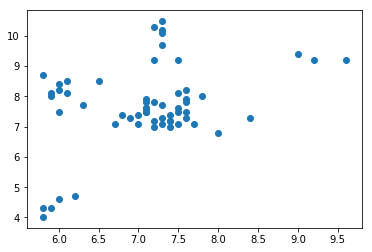

In [11]:
plt.scatter(fruits['width'],fruits['height'])

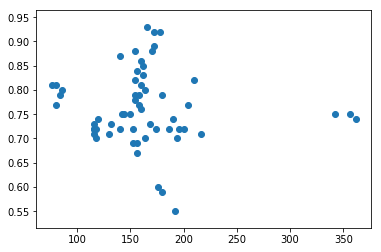

In [12]:
plt.scatter(fruits['mass'],fruits['color_score'])

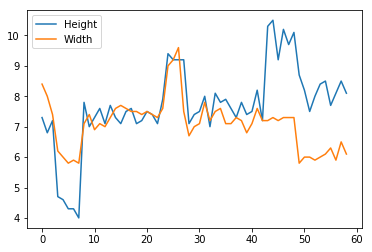

In [13]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

Now we will use K-Nearest Neighbors classifier to predict a new record on the basis of this data. For this we will aplit this dataset into test and train sets. First we will import sklearn library for our model.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [15]:
X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [16]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [17]:
X_test.describe()

,mass,width,height
count,15.000000,15.00000,15.000000
mean,174.933333,7.30000,7.840000
std,60.075508,0.75119,1.369463
min,84.000000,6.00000,4.600000
25%,146.000000,7.10000,7.250000
50%,166.000000,7.20000,7.600000
75%,185.000000,7.45000,8.150000
max,362.000000,9.60000,10.300000


Now we will create a KNN classifier for making predictions.

In [18]:
knn=KNeighborsClassifier()

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

We can check the accuracy of our classifier

In [20]:
knn.score(X_test,y_test)

0.53333333333333333

Now we can make predictions with new data as following:

In [21]:
#parameters of following function are mass,width and height
#example1
prediction1=knn.predict([['100','6.3','8']])
predct[prediction1[0]]

'lemon'

In [22]:
#example2
prediction2=knn.predict([['300','7','10']])
predct[prediction2[0]]

'orange'

Yes, our model is running successfully and making accurate predictions.
Enjoy....!